# Dataset
### Download Dataset
Download dataset from https://github.com/udacity/self-driving-car/tree/master/datasets/CH2

### Prepare Dataset

In [2]:
# clean up dataset and calculate speed_gps
! cd data/udacity && python data_to_csv.py

                               index            timestamp  ...  diff  angle_gps
33799  2016-11-17 23:49:31.893344807  1479426571893344807  ... -0.44       None
33800  2016-11-17 23:49:31.943421726  1479426571943421726  ...  0.23       None
33801  2016-11-17 23:49:31.993479662  1479426571993479662  ...  0.38       None
33802  2016-11-17 23:49:32.043370134  1479426572043370134  ...  0.27       None
33803  2016-11-17 23:49:32.093387936  1479426572093387936  ...  0.42       None
33804  2016-11-17 23:49:32.143513175  1479426572143513175  ... -0.33       None
33805  2016-11-17 23:49:32.193253275  1479426572193253275  ... -0.18       None
33806  2016-11-17 23:49:32.243347757  1479426572243347757  ...  0.32       None
33807  2016-11-17 23:49:32.293518518  1479426572293518518  ...  0.32       None
33808  2016-11-17 23:49:32.343447996  1479426572343447996  ...  0.33       None

[10 rows x 22 columns]


mse:  0.010820631009462709


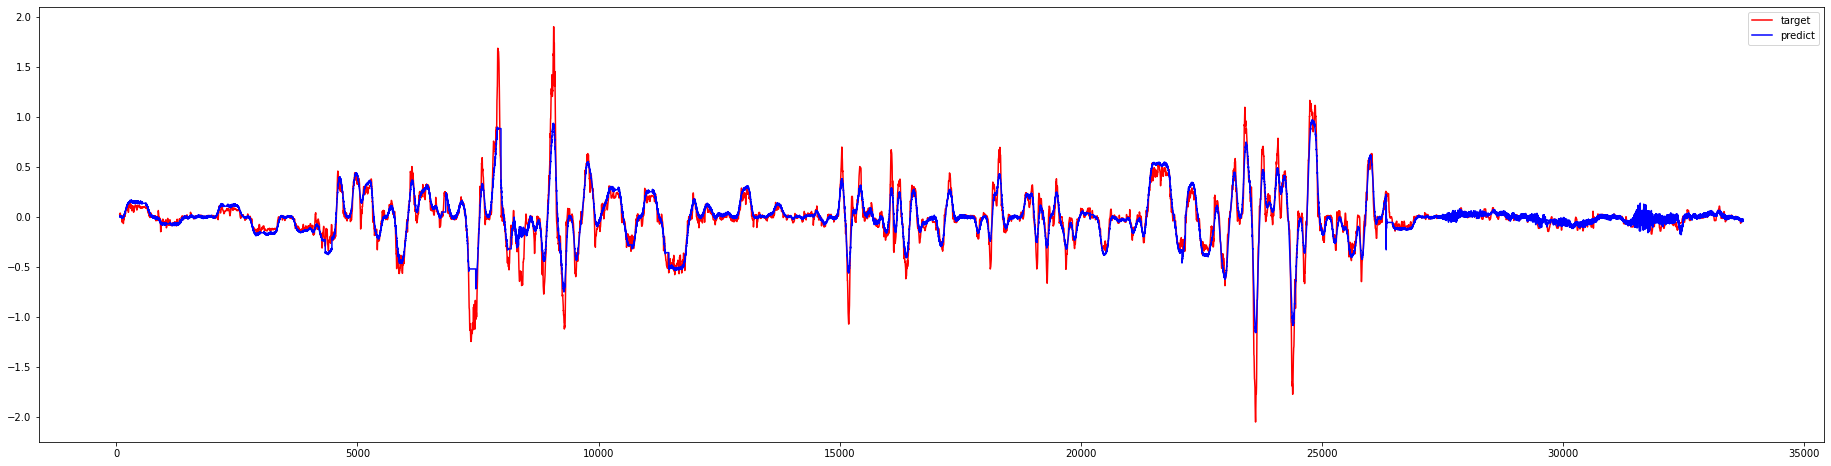

In [3]:
# visualise angle to predicted angle using angle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
df = pd.read_csv("data/udacity/data.csv")
df = df[df['angle_gps'].notna()]
mse = mean_squared_error(df.angle, df.angle_gps)
print("mse: ", mse)
plt.figure(figsize=(32, 8))
plt.plot(df['angle'], "r", label="target")
plt.plot(df['angle_gps'], "b", label="predict")
plt.legend(loc="best")
plt.show()

mse:  0.3334180783988986


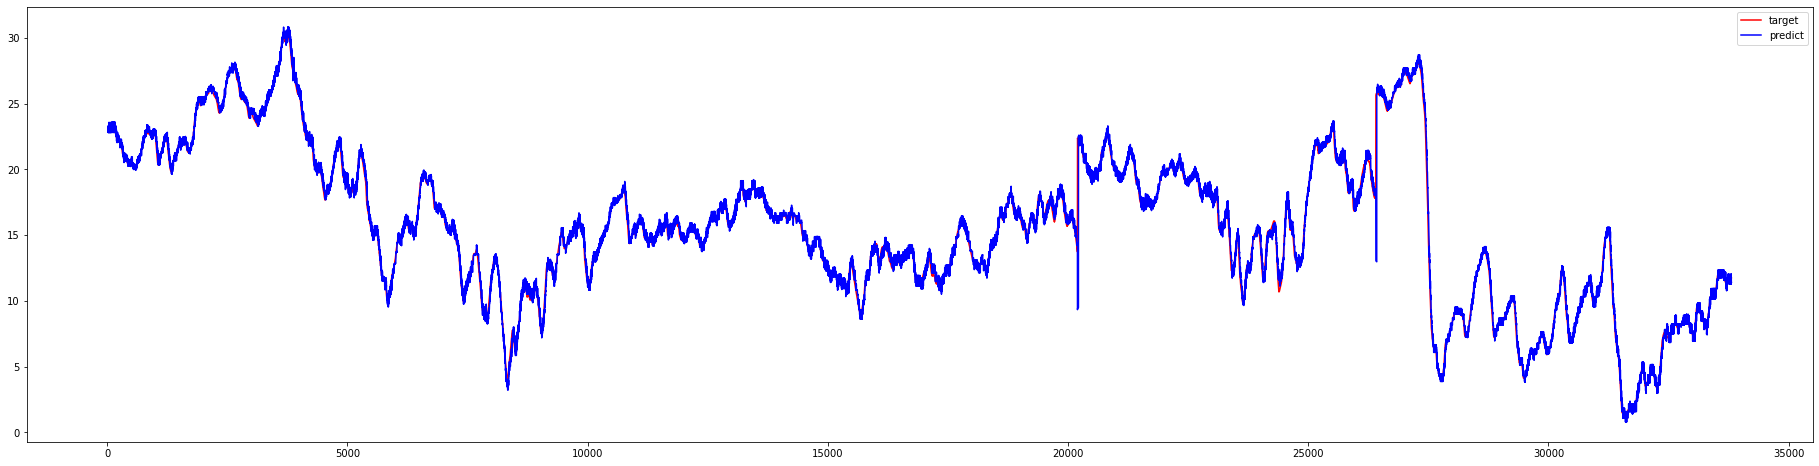

In [4]:
# visualise speed to predicted speed using gps
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
df = pd.read_csv("data/udacity/data.csv")
df = df[df['speed_gps'].notna()]
mse = mean_squared_error(df.speed, df.speed_gps)
print("mse: ", mse)
plt.figure(figsize=(32, 8))
plt.plot(df['speed'], "r", label="target")
plt.plot(df['speed_gps'], "b", label="predict")
plt.legend(loc="best")
plt.show()

In [5]:
# preprocess data
# ! python preprocess/preprocess.py config_udacity dataonly
! python preprocess/preprocess.py config_udacity images

Pre-processing data...
Pre-processing data done


In [18]:
# attack CAN Frames on angle
! cd data/udacity && python attack.py

Attacking data...
Attacking done


In [19]:
# split into train, validation and test datasets
! python preprocess/split.py config_udacity

Splittintg data...
Splittintg done


# Training RAIDS
### Train RAIDS Stage 1

In [20]:
# train stage 1: angle
! cd stage1 && python train.py config_udacity angle

Loading training data...
Creating model...
Layer (type:depth-idx)                   Output Shape              Param #
stage1                                   [32, 1]                   --
├─Sequential: 1-1                        [32, 24, 50, 50]          --
│    └─Conv2d: 2-1                       [32, 24, 50, 50]          456
│    └─ReLU: 2-2                         [32, 24, 50, 50]          --
├─Sequential: 1-2                        [32, 40000]               --
│    └─Conv2d: 2-3                       [32, 64, 25, 25]          13,888
│    └─ReLU: 2-4                         [32, 64, 25, 25]          --
│    └─Flatten: 2-5                      [32, 40000]               --
├─Sequential: 1-3                        [32, 500]                 --
│    └─Linear: 2-6                       [32, 500]                 20,000,500
│    └─ReLU: 2-7                         [32, 500]                 --
│    └─Dropout: 2-8                      [32, 500]                 --
├─Sequential: 1-4            

In [21]:
# test stage 1: angle
! cd stage1 && python predict.py config_udacity angle

Loading testing data...
Creating model...
Testing Loss: 0.02146040853496075
mse:  0.021367967221161632


In [ ]:
# visualise angle to predicted angle using angle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
df = pd.read_csv("data/udacity/Y_all_stage1.csv")
df = df[df['angle_gps'].notna()]
mse = mean_squared_error(df.angle_stage, df.angle_gps)
print("mse: ", mse)
plt.figure(figsize=(32, 8))
plt.plot(df['angle_stage'], "r", label="target")
plt.plot(df['angle_gps'], "b", label="predict")
plt.legend(loc="best")
plt.show()

df['diff'] = abs(df['angle_stage']- df['angle_gps'])
print(df['diff'].describe())

### Train RAIDS Stage 2

In [5]:
# train stage 2 with evade dataset
! cd stage2 && python train.py config_udacity evade angle

Loading training data...
Creating model...
Layer (type:depth-idx)                   Output Shape              Param #
stage2                                   [32, 1]                   --
├─Linear: 1-1                            [32, 2]                   4
├─Linear: 1-2                            [32, 1]                   3
Total params: 7
Trainable params: 7
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
Length of dataloader : 737
epoch: 1 completed: 0%
epoch: 1 completed: 10%
epoch: 1 completed: 20%
epoch: 1 completed: 30%
epoch: 1 completed: 40%
epoch: 1 completed: 50%
epoch: 1 completed: 60%
epoch: 1 completed: 70%
epoch: 1 completed: 80%
epoch: 1 completed: 90%
########################### VALIDATION ##########################
Epoch 1 		 Training Loss: 0.3096500550315756 		 Validation Loss: 0.19559911847304387
TN, FP, FN, TP : [3437   95   79 1439]
accuracy : 0.9655

In [6]:
# test stage 2 with evade dataset
! cd stage2 && python predict.py config_udacity evade angle

CUDA Available:  True
Loading testing data...
Testing Loss: 0.1756329506066195
TN, FP, FN, TP : [3426  105   74 1446]
accuracy : 0.9645614729756484
       TN     FP    FN      TP  ...   TP_Rate   FP_Rate   TN_Rate   FN_Rate
1  3426.0  105.0  74.0  1446.0  ...  0.951316  0.029737  0.970263  0.048684

[1 rows x 15 columns]


# Proposed Attacks
### Training advGAN, advGANU and optU to attack RAIDS

In [ ]:
# train advGAN
! cd attacks && python advGAN_attack.py config_udacity none angle

Loading training data...
Start advGAN_uni training
CUDA Available:  True
epoch: 1 completed: 0%
epoch: 1 completed: 10%
epoch: 1 completed: 20%
epoch: 1 completed: 30%
epoch: 1 completed: 40%
epoch: 1 completed: 50%
epoch: 1 completed: 60%
epoch: 1 completed: 70%
epoch: 1 completed: 80%
epoch: 1 completed: 90%
epoch 1:
loss_D: 0.222, loss_G_fake: 0.540,            
loss_perturb: 6.039, loss_adv: 0.028, 

epoch: 2 completed: 0%
epoch: 2 completed: 10%
epoch: 2 completed: 20%
epoch: 2 completed: 30%
epoch: 2 completed: 40%
epoch: 2 completed: 50%
epoch: 2 completed: 60%
epoch: 2 completed: 70%
epoch: 2 completed: 80%
epoch: 2 completed: 90%
epoch 2:
loss_D: 0.032, loss_G_fake: 0.851,            
loss_perturb: 2.830, loss_adv: 0.017, 

epoch: 3 completed: 0%
epoch: 3 completed: 10%
epoch: 3 completed: 20%
epoch: 3 completed: 30%
epoch: 3 completed: 40%
epoch: 3 completed: 50%
epoch: 3 completed: 60%
epoch: 3 completed: 70%
epoch: 3 completed: 80%
epoch: 3 completed: 90%
epoch 3:
loss_D: 0

In [26]:
# train optU
! cd attacks && python optimization_universal_attack.py config_udacity none angle

Loading training data...
Length of dataloader : 23664
Start optiU training
Starting pass number:  0
training completed: 10%
training completed: 20%
training completed: 30%
training completed: 40%
training completed: 50%
training completed: 60%
training completed: 70%
training completed: 80%
training completed: 90%
training completed: 100%
Fooling rate:  1.0
Finish optiU training.


### Attacking RAIDS Stage 1 using FGSM, Opt, OptU, advGAN and advGANU

In [ ]:
# attack RAIDS
! cd attacks && python attacking.py config_udacity none angle

CUDA Available:  True
Loading testing data...
Length of dataloader : 5072
Attacking: RAIDS
testing FGSM
attacks completed: 0%
attacks completed: 10%
attacks completed: 20%
attacks completed: 30%
attacks completed: 40%
attacks completed: 50%
attacks completed: 60%
attacks completed: 70%
attacks completed: 80%
attacks completed: 90%
robustness 0.050527178
Success Rate of FGSM: 0.41009463722397477
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
TN, FP, FN, TP : [4798  274    0    0]
RAIDS without attack:
       TN     FP   FN   TP  ...  TP_Rate   FP_Rate   TN_Rate  FN_Rate
0  4798.0  274.0  0.0  0.0  ...      NaN  0.054022  0.945978      NaN

[1 rows x 15 columns]
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-pack

In [ ]:
# calculate average and standard D of each attack
import pandas as pd
df = pd.read_csv("attacks/results/udacity_diff_none.csv")
print(df.describe())

### Evading RAIDS using FGSM, Opt, OptU, advGAN and advGANU

In [ ]:
# attack RAIDS
! cd attacks && python evading.py config_udacity evade angle

CUDA Available:  False
Loading testing data...
Length of dataloader : 5072
Attacking: RAIDS
testing FGSM
attacks completed: 0%
attacks completed: 10%
attacks completed: 20%


# Proposed Defence
### Feature Squeezing

In [ ]:
# defence: feature squeezing
! cd defences && python feature_squeeze.py config_udacity none angle

In [6]:
# score calculation
! cd defences && python feature_squeeze_score.py config_udacity none angle

Detection results
Detection results
Detection results
Detection results
Detection results


# RAIDS2

In [ ]:
# test combined with stage 1a: Feature Squeezing
! cd RAIDS2 && python combined.py config_udacity evade angle fgsm RAIDS2
! cd RAIDS2 && python combined.py config_udacity evade angle opt RAIDS2
# ! cd RAIDS2 && python combined.py config_udacity evade angle OptU RAIDS2
! cd RAIDS2 && python combined.py config_udacity evade angle advGAN RAIDS2
! cd RAIDS2 && python combined.py config_udacity evade angle advGANU RAIDS2

CUDA Available:  False
Loading testing data...
attacking RAIDS using  fgsm
Length of dataloader : 5051
attacks completed: 0%
attacks completed: 10%


In [ ]:
# RAIDS: test combined without stage 1a: Feature Squeezing
! cd RAIDS2 && python combined.py config_udacity evade angle fgsm RAIDS
! cd RAIDS2 && python combined.py config_udacity evade angle opt RAIDS
# ! cd RAIDS2 && python combined.py config_udacity evade angle OptU RAIDS
! cd RAIDS2 && python combined.py config_udacity evade angle advGAN RAIDS
! cd RAIDS2 && python combined.py config_udacity evade angle advGANU RAIDS